In [1]:
import datetime
import re

import matplotlib.font_manager as fm
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
name_source = "defensive.xlsx"
df_code = pd.read_excel(name_source)
df_code

,コード,銘柄名
0,1301,極洋
1,1332,ニッスイ
2,1333,マルハニチロ
3,2002,日清粉Ｇ
4,2267,ヤクルト
...,...,...
63,9535,広ガス
64,9536,西部ガスＨＤ
65,9537,北陸ガス
66,9539,葉ガス


In [3]:
df_result = pd.DataFrame()
for code in df_code["コード"]:
    symbol = f"{code}.T"
    ticker = yf.Ticker(symbol)
    ser = ticker.history(period="1y")["Close"]
    df_result[code] = ser / ser.iloc[0]
df_result

,1301,1332,1333,2002,2267,2282,2502,2503,2593,2802,...,9513,9531,9532,9533,9534,9535,9536,9537,9539,9543
Date,,,,,,,,,,,,,,,,,,,,,
2024-06-03 00:00:00+09:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2024-06-04 00:00:00+09:00,1.005236,0.996283,0.996046,1.004511,1.009582,0.993193,1.001208,1.006381,0.984817,1.001057,...,0.988249,0.998600,0.988999,0.982009,0.977961,1.000000,1.001015,0.998534,0.999641,1.000000
2024-06-05 00:00:00+09:00,1.007853,0.985695,0.980839,1.009304,1.008537,0.994843,1.007250,1.014585,0.988482,1.006697,...,0.976883,0.985998,0.989563,0.977261,0.949036,0.994751,0.993912,0.983871,0.999641,0.983420
2024-06-06 00:00:00+09:00,1.005236,0.983667,0.967457,1.010431,0.994251,0.991543,1.003798,1.011851,0.956545,1.020268,...,0.979387,0.994399,0.995769,0.983758,0.969697,1.000000,0.993912,0.983871,0.997846,0.978238
2024-06-07 00:00:00+09:00,1.002618,0.988286,0.968674,1.011841,0.991812,1.002269,1.005351,1.009572,0.959948,1.025026,...,0.972838,0.975077,0.990409,0.969765,0.962810,1.002625,0.993912,1.008798,0.994257,0.975130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-27 00:00:00+09:00,1.174159,0.954826,0.933131,0.997762,1.038837,1.068021,0.999353,0.982437,0.852829,1.251694,...,0.970378,1.349410,1.057984,1.042496,0.774594,0.940391,0.938966,1.101644,1.380960,1.176480
2025-05-28 00:00:00+09:00,1.166061,0.956423,0.941783,0.994333,1.035279,1.069927,1.011332,0.977956,0.845402,1.272776,...,0.967371,1.348562,1.057114,1.038676,0.771793,0.943101,0.940549,1.092639,1.355852,1.175402
2025-05-29 00:00:00+09:00,1.164712,0.957678,0.943637,0.992619,1.026741,1.069927,1.011066,0.973240,0.838240,1.300289,...,0.971179,1.346864,1.058564,1.032310,0.775995,0.943101,0.941604,1.092639,1.372227,1.177558


### 日付文字列

In [4]:
dt_start = df_result.index[0]
date_str = f"{dt_start.year:04}-{dt_start.month:02}-{dt_start.day:02}"
row_last = len(df_result) - 1
dt_end = df_result.index[row_last]
date_latest_str = f"{dt_end.year:04}{dt_end.month:02}{dt_end.day:02}"
date_latest_str

'20250602'

In [8]:
df_top = df_result.iloc[row_last].sort_values(ascending=False).head(6)
df_top

4506    2.454268
4519    1.618023
9531    1.375437
9539    1.351485
9006    1.341124
2802    1.296001
Name: 2025-06-02 00:00:00+09:00, dtype: float64

In [9]:
list_top = list(df_top.index)
list_top

[4506, 4519, 9531, 9539, 9006, 2802]

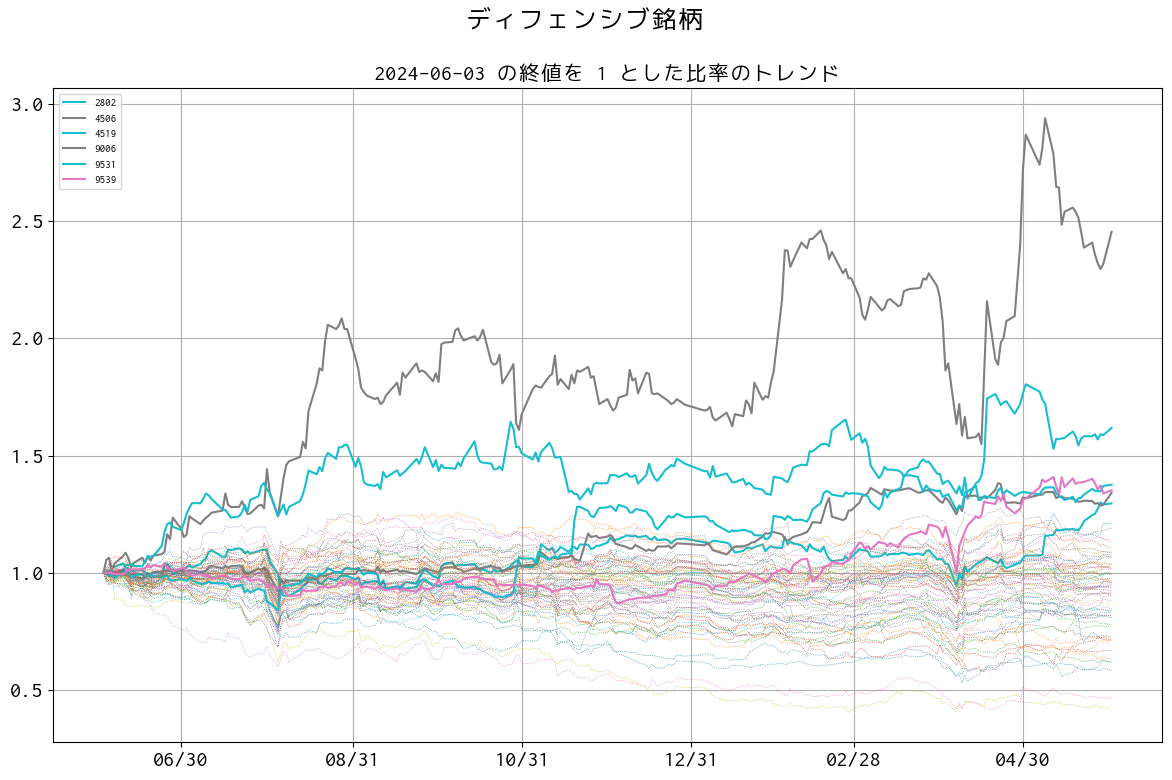

In [12]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 16

fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(top=0.91)

for colname in df_result.columns:
    if colname in list_top:
        width = 1.5
        lstyle = "solid"
        ax.plot(df_result[colname], lw=width, ls=lstyle, label=colname)
    else:
        width = 0.5
        lstyle = "dotted"
        ax.plot(df_result[colname], lw=width, ls=lstyle)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
fig.suptitle("ディフェンシブ銘柄")
ax.set_title(f"{date_str} の終値を 1 とした比率のトレンド", fontsize=16)
ax.grid()
ax.legend(loc='upper left', fontsize=8)
plt.tight_layout()

plt.savefig(f"screenshots/{date_latest_str}_report_defensivr.png")
plt.show()

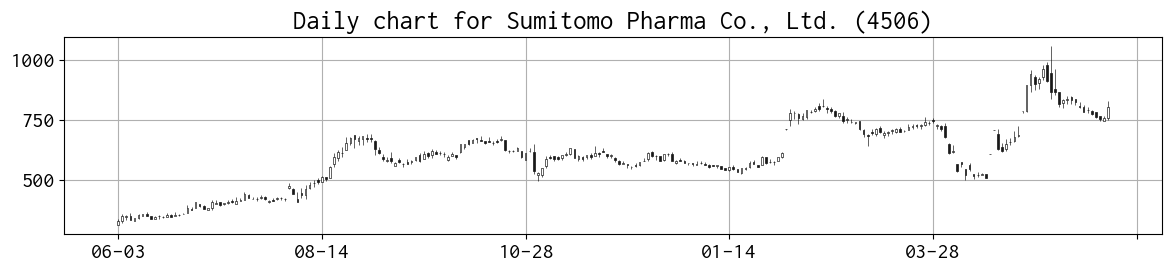

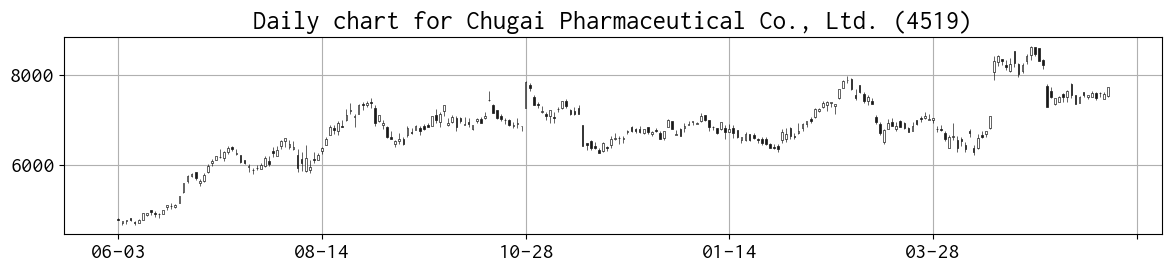

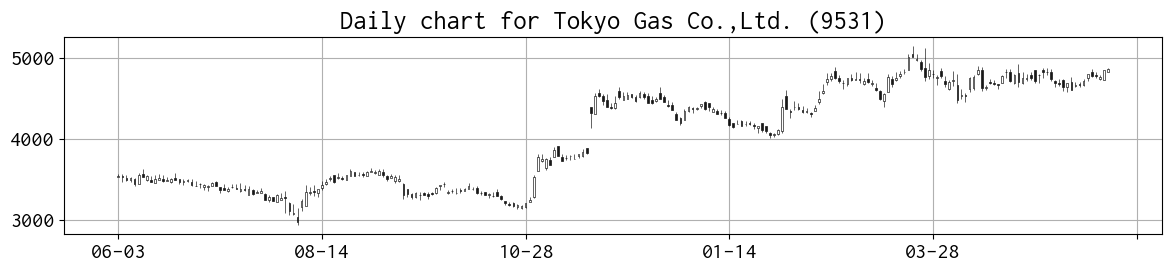

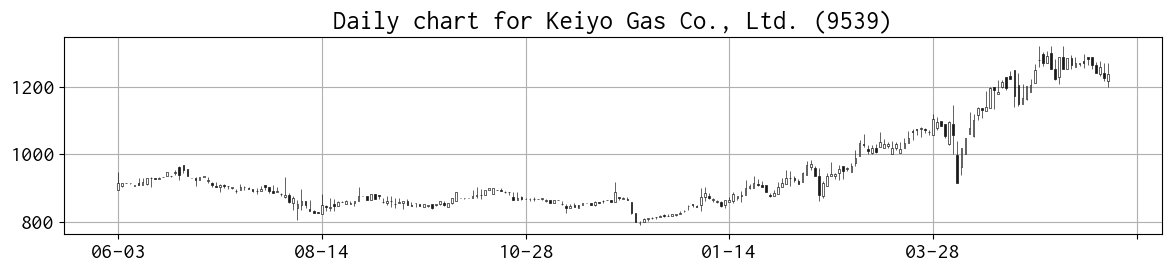

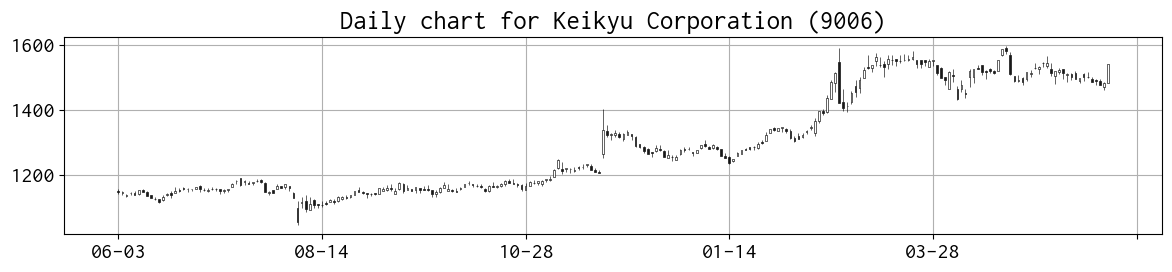

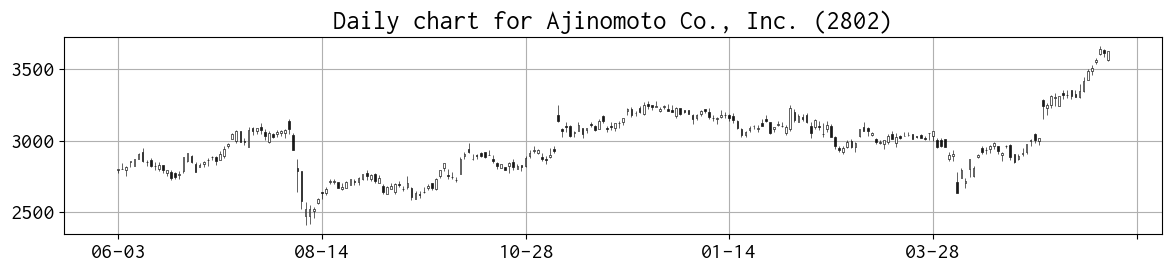

In [11]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 16

for code in list_top:
    symbol = f"{code}.T"
    ticker = yf.Ticker(symbol)
    df = ticker.history(period="1y")
    fig, ax = plt.subplots(figsize=(12, 3))
    mpf.plot(
        df,
        type='candle',
        style='default',
        volume=False,
        datetime_format='%m-%d',
        xrotation=0,
        ax=ax
    )
    ax.set_ylabel(None)
    ax.grid()
    ax.set_title(f"Daily chart for {ticker.info['longName']} ({code})")
    plt.tight_layout()
    plt.savefig(f"screenshots/{date_latest_str}_daily_chart_{code}.png")
    plt.show()